In [1]:
import xarray as xr
import modelskill as ms

## Observations

In [2]:
o1 = ms.PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## MIKE ModelResult

In [3]:
mrMIKE = ms.ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu', name='MIKE21SW', item=0)

## NetCDF ModelResult

In [4]:
fn = "../tests/testdata/SW/ERA5_DutchCoast.nc"
xr.open_dataset(fn)

<xarray.Dataset>
Dimensions:    (longitude: 20, latitude: 11, time: 67)
Coordinates:
  * longitude  (longitude) float32 -1.0 -0.5 0.0 0.5 1.0 ... 6.5 7.0 7.5 8.0 8.5
  * latitude   (latitude) float32 55.0 54.5 54.0 53.5 ... 51.5 51.0 50.5 50.0
  * time       (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
Data variables:
    mwd        (time, latitude, longitude) float32 ...
    mwp        (time, latitude, longitude) float32 ...
    mp2        (time, latitude, longitude) float32 ...
    pp1d       (time, latitude, longitude) float32 ...
    swh        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-07 12:25:02 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
mrERA5 = ms.ModelResult(fn, item="swh", name='ERA5')

In [6]:
mrERA5

In [7]:
mrERA5.data  # mr contains the xr.Dataset

<xarray.DataArray 'swh' (time: 67, y: 11, x: 20)>
[14740 values with dtype=float32]
Coordinates:
  * x        (x) float32 -1.0 -0.5 0.0 0.5 1.0 1.5 ... 6.0 6.5 7.0 7.5 8.0 8.5
  * y        (y) float32 55.0 54.5 54.0 53.5 53.0 52.5 52.0 51.5 51.0 50.5 50.0
  * time     (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
Attributes:
    units:      m
    long_name:  Significant height of combined wind waves and swell

## Test extract from XArray

1) Extract point 
2) Extract track

In [8]:
mrERA5.extract(o1).data.head()

<xarray.Dataset>
Dimensions:  (time: 5)
Coordinates:
  * time     (time) datetime64[ns] 2017-10-27 ... 2017-10-27T04:00:00
    x        float64 4.242
    y        float64 52.69
    z        object None
Data variables:
    ERA5     (time) float32 1.22 1.347 1.466 1.612 1.793
Attributes:
    gtype:    point

In [9]:
mrERA5.extract(o3).data.head()

<xarray.Dataset>
Dimensions:  (time: 5)
Coordinates:
  * time     (time) datetime64[ns] 2017-10-27T12:52:52.337000 ... 2017-10-27T...
    x        (time) float64 2.423 2.414 2.405 2.396 2.387
    y        (time) float64 51.25 51.31 51.37 51.42 51.48
    z        float64 nan
Data variables:
    ERA5     (time) float64 1.439 1.464 1.489 1.514 1.538
Attributes:
    gtype:    track

## Multi-file ModelResult

Use mfdataset to load multiple files as a single ModelResult.

In [10]:
fn = "../tests/testdata/SW/CMEMS_DutchCoast_*.nc"
mrCMEMS = ms.ModelResult(fn, item="VHM0", name='CMEMS')
mrCMEMS

## Grib file ModelResult

In [11]:
fn = r"../tests/testdata/SW/NWW3_hs_201710.grib"

In [12]:
#mr3 = ModelResult(fn, name='WW3', engine='cfgrib') # not yet supported

## Connect multiple models and observations and extract

<Axes: >

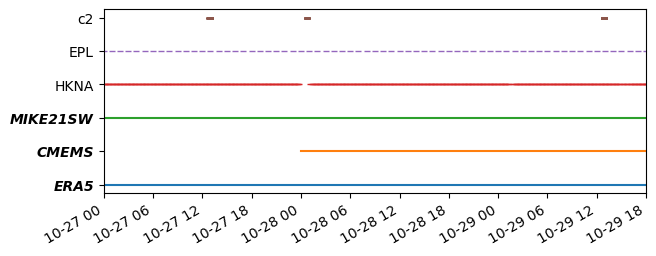

In [13]:
ms.plotting.temporal_coverage(obs=[o1,o2,o3], mod=[mrERA5, mrCMEMS, mrMIKE])

In [14]:
cc = ms.compare(obs=[o1,o2,o3], mod=[mrERA5, mrCMEMS, mrMIKE])

## Analysis and plotting
Which model is better? 

In [15]:
sk = cc.skill()
sk.swaplevel().sort_index(level="observation").style()

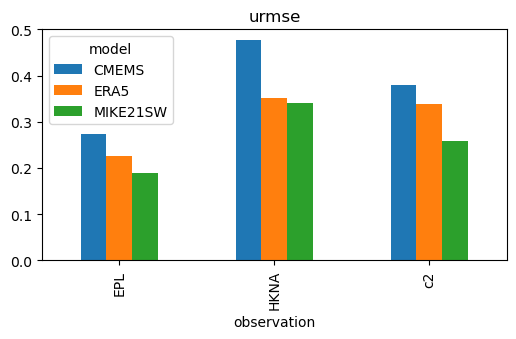

In [16]:
sk.plot.bar('urmse', figsize=(6,3));

In [17]:
cc.mean_skill().style()

,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,
CMEMS,318,-0.493,0.627,0.376,0.530,0.909,0.103,0.368
ERA5,318,-0.442,0.539,0.305,0.457,0.936,0.084,0.460
MIKE21SW,318,0.006,0.344,0.263,0.277,0.947,0.072,0.774


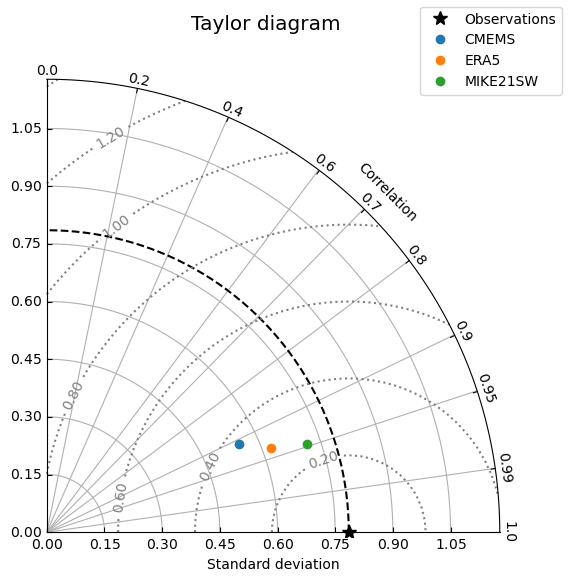

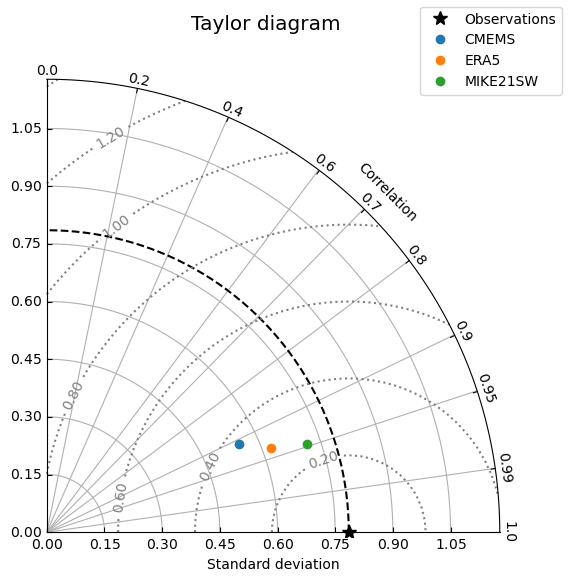

In [18]:
cc.plot.taylor(figsize=6)